In [1]:
import sys
sys.path.insert(0, '../shampoo')
import numpy as np

In [2]:
reconstructions_grid = np.arange(1, 10, 2)#np.logspace(0, 1, 10,  dtype=int)

fftw_times = []
fftw_times2 = []
fftw_times4 = []

scipyfft_times = []

from shampoo.fftutils import FFTW
from shampoo.fftutils import ScipyFFT

from pyfftw.interfaces.scipy_fftpack import fft2 as fftw_scipy_fft2

hologram_path = '../shampoo/data/USAF_test.tif'
from shampoo.reconstruction import _load_hologram
hologram = _load_hologram(hologram_path)

def call_fftw(n_reconstructions):
    for i in range(n_reconstructions):
        _ = fftw_scipy_fft2(hologram)

def call_fftw2(n_reconstructions):
    fftw = FFTW(hologram, threads=2)
    for i in range(n_reconstructions):
        _ = fftw.fft2(hologram)

def call_fftw4(n_reconstructions):
    fftw = FFTW(hologram, threads=4)
    for i in range(n_reconstructions):
        _ = fftw.fft2(hologram)

def call_scipy(n_reconstructions):
    scipyfft = ScipyFFT(hologram)
    for i in range(n_reconstructions):
        _ = scipyfft.fft2(hologram)
        
for n_reconstructions in reconstructions_grid:

    fftw_time = %timeit -o call_fftw(n_reconstructions)
    fftw_times.append(fftw_time.best)
    
    fftw_time2 = %timeit -o call_fftw2(n_reconstructions)
    fftw_times2.append(fftw_time2.best)
    
    fftw_time4 = %timeit -o call_fftw4(n_reconstructions)
    fftw_times4.append(fftw_time4.best)

    scipyfft_time = %timeit -o call_scipy(n_reconstructions)
    scipyfft_times.append(scipyfft_time.best)

The slowest run took 30.25 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 71 ms per loop
The slowest run took 46.83 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 47.7 ms per loop
The slowest run took 49.33 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 35.8 ms per loop
10 loops, best of 3: 50.3 ms per loop
1 loop, best of 3: 206 ms per loop
10 loops, best of 3: 109 ms per loop
10 loops, best of 3: 64.4 ms per loop
10 loops, best of 3: 135 ms per loop
1 loop, best of 3: 344 ms per loop
10 loops, best of 3: 174 ms per loop
10 loops, best of 3: 97.2 ms per loop
1 loop, best of 3: 233 ms per loop
1 loop, best of 3: 472 ms per loop
1 loop, best of 3: 226 ms per loop
10 loops, best of 3: 131 ms per loop
1 loop, best of 3: 323 ms per loop
1 loop, best of 3: 616 ms per loop
1 loop, best of 3: 312 ms per 

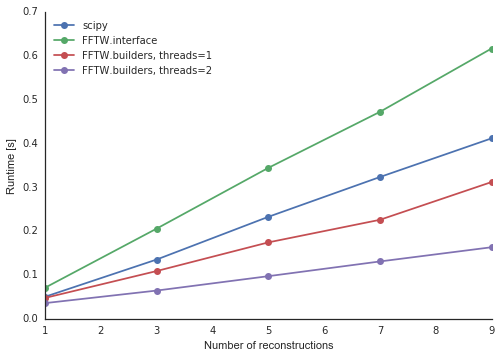

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

plt.plot(reconstructions_grid, scipyfft_times, '-o', label='scipy')
plt.plot(reconstructions_grid, fftw_times, '-o', label='FFTW.interface')
plt.plot(reconstructions_grid, fftw_times2, '-o', label='FFTW.builders, threads=1')
plt.plot(reconstructions_grid, fftw_times4, '-o', label='FFTW.builders, threads=2')

plt.xlabel('Number of reconstructions')
plt.ylabel('Runtime [s]')
plt.legend(loc='upper left')
sns.despine()
plt.savefig('plots/profiling.png', bbox_inches='tight', dpi=200)